In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##Detection of Autism Spectrum Disorder Using Machine Learning Techniques

Autism Spectrum Disorder (ASD) is a neurodevelopmental condition
characterized by challenges in social interaction, communication, and repetitive behaviors. It's a spectrum disorder, meaning symptoms vary widely among individuals. Despite difficulties, many with autism have unique strengths. Machine learning techniques can help analyze ASD data for early detection, personalized interventions, and improving quality of life.

Imports essential Python libraries for data analysis and visualization: NumPy for numerical operations, Pandas for data manipulation, Matplotlib for plotting, Seaborn for statistical visualization, and SciPy for statistical analysis. It also includes functions for file handling and suppresses warnings to maintain a clean output environment.

In [ ]:
!pip install plotly
!pip install plotly==5.3.1
!pip install dash
!pip install dash-core-components
!pip install dash-html-components

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.9/23.9 MB 51.7 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.15.0
    Uninstalling plotly-5.15.0:
      Successfully uninstalled plotly-5.15.0


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 51.2 MB/s eta 0:00:00


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.io as pio
import plotly.graph_objects as go
import plotly.express as px
import plotly.figure_factory as ff
from sklearn.preprocessing import LabelEncoder
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode, iplot
from scipy.stats import chi2_contingency
from pandas.api.types import CategoricalDtype
import os

# Define the directory path within your Google Drive
directory_path = "https://drive.google.com/drive/folders/1uU3Cu5_KjHizn9iev4qhLDSGKrqvCSEM?usp=drive_link"

for dirname, _, filenames in os.walk(directory_path):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings("ignore")

In [2]:
train= pd.read_csv('https://drive.google.com/uc?export=download&id=1wEMrWKtNnLgtxbLrHxNf_xgjjEmG-fxg')
test= pd.read_csv('https://drive.google.com/uc?export=download&id=1d4P4cugVa0Y4GXx9VD51iPQ8Yq9WfxU9')

Below is the columns description of the datasets
*   ID - ID of the patient
*   A1_Score to A10_Score - Score based on Autism Spectrum Quotient (AQ) 10 item screening tool
*   age - Age of the patient in years
*   gender - Gender of the patient
*   ethnicity - Ethnicity of the patient
*   jaundice - Whether the patient had jaundice at the time of birth
*   autism - Whether an immediate family member has been diagnosed with autism
*   contry_of_res - Country of residence of the patient
*   used_app_before - Whether the patient has undergone a screening test before
*   result - Score for AQ1-10 screening test
*   age_desc - Age of the patient
*   relation - Relation of patient who completed the test
*   Class/ASD - Classified result as 0 or 1. Here 0 represents No and 1 represents Yes. This is the target column, and during submission submit the values as 0 or 1 only.


## Exploratory Data Analysis

It's an approach to analyzing datasets to summarize their main characteristics, often using visual methods. EDA is used to understand the underlying structure, patterns, and relationships in the data before applying more formal statistical techniques.

In [3]:

train = train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")
test = test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

In [4]:
train.shape

(800, 22)

In [5]:
train.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,1,1,1,0,1,1,...,f,White-European,no,no,United States,no,7.819715,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,...,f,South Asian,no,no,Australia,no,10.544296,18 and more,?,0
2,3,1,1,1,1,1,1,0,0,1,...,f,White-European,no,no,United Kingdom,no,13.167506,18 and more,Self,1
3,4,0,0,0,1,0,0,0,0,0,...,f,South Asian,no,no,New Zealand,no,1.530098,18 and more,?,0
4,5,0,0,0,0,1,0,0,0,1,...,m,Black,no,yes,Italy,no,7.949723,18 and more,Self,0


In [6]:
train.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [7]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in train.columns if train[feature].dtypes == 'O']
num_cols = [feature for feature in train.columns if feature not in cat_cols]

In [8]:
## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result', 'Class/ASD']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before', 'age_desc', 'relation']


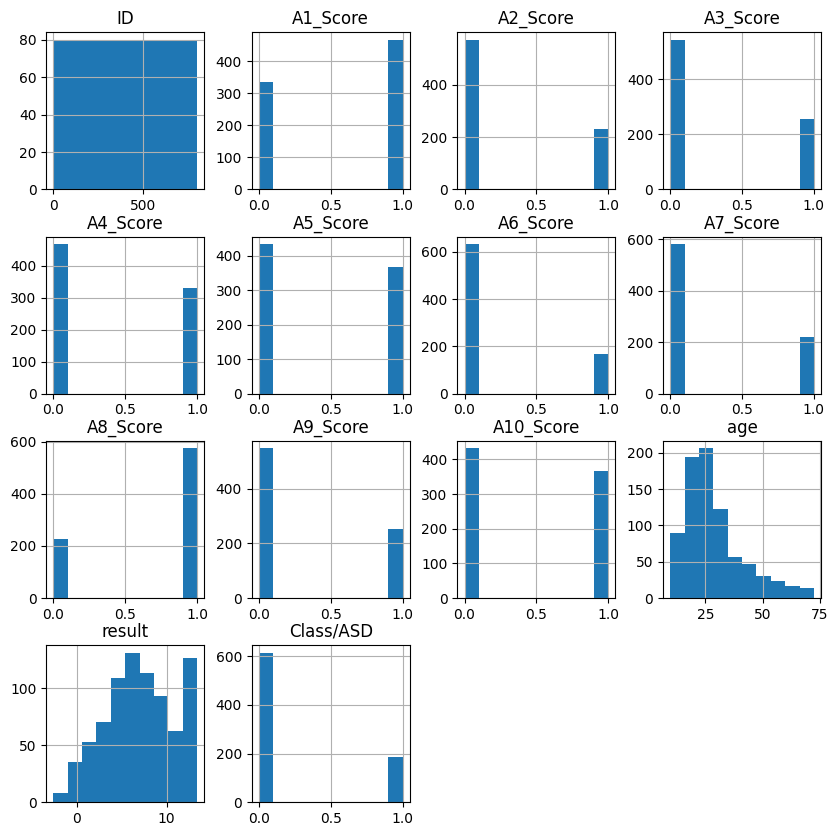

In [9]:
train.hist(figsize=(10,10))
plt.show()

In [10]:
test.shape

(200, 21)

In [11]:
test.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,...,age,gender,ethnicity,jaundice,autism,country_of_res,used_app_before,result,age_desc,relation
0,1,0,0,0,0,0,0,0,1,0,...,13.445319,m,Asian,no,no,United Arab Emirates,no,-0.914467,18 and more,?
1,2,1,0,0,0,1,0,0,0,0,...,25.057229,f,?,yes,no,New Zealand,no,4.553447,18 and more,Parent
2,3,1,0,0,1,0,1,0,1,0,...,28.799885,f,Asian,no,no,Austria,no,-1.581115,18 and more,Self
3,4,1,1,1,0,1,0,1,0,1,...,16.501526,f,Middle Eastern,yes,no,Bahamas,no,11.779210,18 and more,Relative
4,5,1,0,0,1,1,0,0,1,1,...,54.223869,f,White-European,no,no,Australia,no,10.717321,18 and more,Self


In [12]:
test.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res',
       'used_app_before', 'result', 'age_desc', 'relation'],
      dtype='object')

In [ ]:
## Finding the numerical and categorical columns
cat_cols = [feature for feature in test.columns if train[feature].dtypes == 'O']
num_cols = [feature for feature in test.columns if feature not in cat_cols]

In [ ]:
## Printing the numerical and categorical columns
print(f"Numerical columns: {num_cols}\n")
print(f"Categorical columns: {cat_cols}")

Numerical columns: ['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'result']

Categorical columns: ['gender', 'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before', 'age_desc', 'relation']


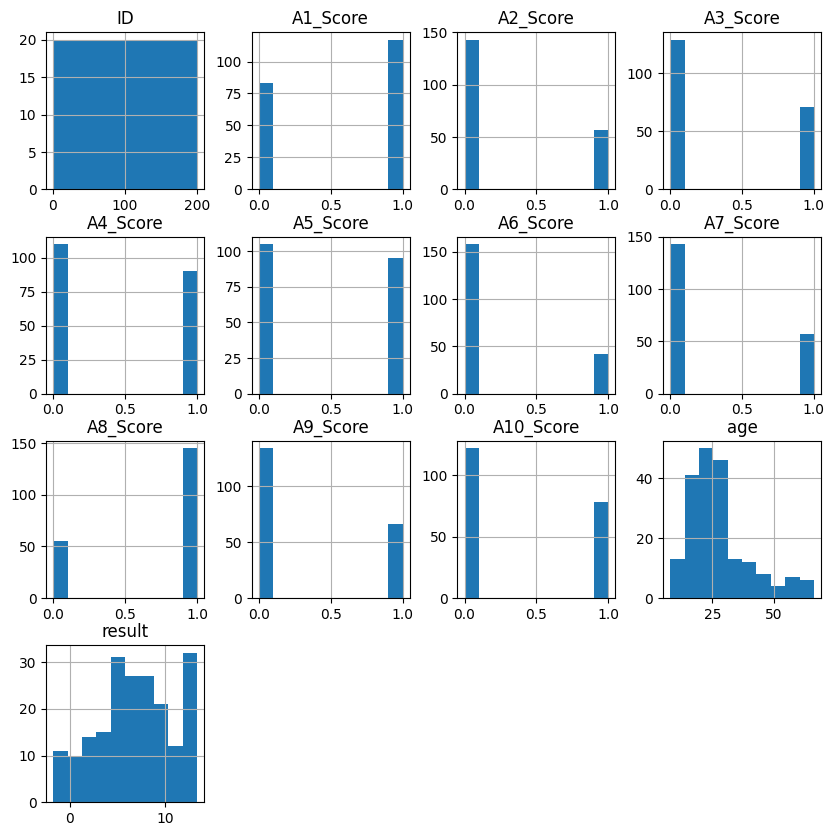

In [ ]:
test.hist(figsize=(10,10))
plt.show()

<Axes: >

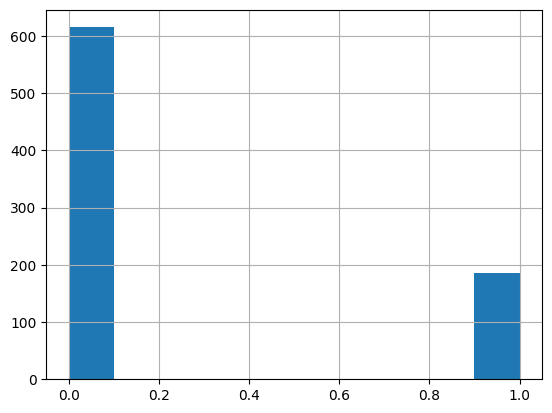

In [ ]:
# The data has a large difference in the number of instances between different classes, so we'll use oversampling to address this imbalance.
train['Class/ASD'].hist()

In [13]:
# No null values in train datasets
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  autism           800 non-null    object 
 16  country_of_res   800 non-null    object 
 17  used_app_before 

In [14]:
# No null values in test datasets
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               200 non-null    int64  
 1   A1_Score         200 non-null    int64  
 2   A2_Score         200 non-null    int64  
 3   A3_Score         200 non-null    int64  
 4   A4_Score         200 non-null    int64  
 5   A5_Score         200 non-null    int64  
 6   A6_Score         200 non-null    int64  
 7   A7_Score         200 non-null    int64  
 8   A8_Score         200 non-null    int64  
 9   A9_Score         200 non-null    int64  
 10  A10_Score        200 non-null    int64  
 11  age              200 non-null    float64
 12  gender           200 non-null    object 
 13  ethnicity        200 non-null    object 
 14  jaundice         200 non-null    object 
 15  autism           200 non-null    object 
 16  country_of_res   200 non-null    object 
 17  used_app_before 

In [15]:
# No null values in both train and test datasets
display(train.isna().sum().sum())
display(test.isna().sum().sum())

0

0


Looking at the initial columns:

* The ID doesn't seem important.
* It appears that the "age_desc" column has only one value. I'll verify this to make sure.

In [16]:
train.age_desc.value_counts()

age_desc
18 and more    800
Name: count, dtype: int64

In [17]:
test.age_desc.value_counts()

age_desc
18 and more    200
Name: count, dtype: int64

By verifying that the "age_desc" column has only one value, it makes sense to drop it.

In [18]:
# drop un-important cols
train.drop(['ID', 'age_desc'], axis=1, inplace=True)
test.drop(['ID', 'age_desc'], axis=1, inplace=True)

cat_cols = [col for col in train.columns if train[col].dtype == 'object']
num_cols = [col for col in train.columns if train[col].dtype == 'int'][0:-1]

ASD_pos = train[train['Class/ASD']==1]
ASD_neg = train[train['Class/ASD']==0]

In [19]:
cat_cols

['gender',
 'ethnicity',
 'jaundice',
 'autism',
 'country_of_res',
 'used_app_before',
 'relation']

In [ ]:
# fix the spelling issue
#train = train.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")
#test = test.rename(columns = {'austim': 'autism', 'contry_of_res':'country_of_res'}, errors="raise")

# fix the other/Other capitalization
train['country_of_res'][train['country_of_res'] == 'others'] = 'Others'
test['country_of_res'][test['country_of_res'] == 'others'] = 'Others'

train['ethnicity'][train['ethnicity'] == 'others'] = 'Others'
test['ethnicity'][test['ethnicity'] == 'others'] = 'Others'

In [ ]:
train.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'autism', 'country_of_res', 'used_app_before',
       'result', 'relation', 'Class/ASD'],
      dtype='object')


# Examine the distinctiveness of categorical features:

* The "country of residence" column is the only one with differing unique values in the train (61) and test (44) datasets.
* Monitor this column to decide if label encoding is necessary during model training.

In [20]:
for col in cat_cols:
    x = train[col].nunique()
    y = test[col].nunique()
    print("{}: train {} unique, test {} unique".format(col, x, y))

gender: train 2 unique, test 2 unique
ethnicity: train 12 unique, test 12 unique
jaundice: train 2 unique, test 2 unique
autism: train 2 unique, test 2 unique
country_of_res: train 61 unique, test 44 unique
used_app_before: train 2 unique, test 2 unique
relation: train 6 unique, test 6 unique


In [21]:
train['country_of_res'].unique()

array(['United States', 'Australia', 'United Kingdom', 'New Zealand',
       'Italy', 'Nicaragua', 'Canada', 'United Arab Emirates',
       'Netherlands', 'Sri Lanka', 'India', 'Armenia', 'Sierra Leone',
       'Argentina', 'Azerbaijan', 'Iceland', 'Egypt', 'Serbia',
       'Afghanistan', 'Costa Rica', 'Jordan', 'Angola', 'Pakistan',
       'Brazil', 'Ireland', 'Kazakhstan', 'Viet Nam', 'Ethiopia',
       'Austria', 'Finland', 'France', 'Malaysia', 'Japan', 'Spain',
       'Philippines', 'Iran', 'Czech Republic', 'Russia', 'Romania',
       'Mexico', 'Belgium', 'Aruba', 'Uruguay', 'Indonesia', 'Ukraine',
       'AmericanSamoa', 'Germany', 'China', 'Iraq', 'Tonga',
       'South Africa', 'Saudi Arabia', 'Hong Kong', 'Bahamas', 'Ecuador',
       'Cyprus', 'Bangladesh', 'Oman', 'Bolivia', 'Sweden', 'Niger'],
      dtype=object)

# Feature Distribution

Target Variable: ASD Class(Autism Spectrum Disorder)

Approximately 77% of the target instances are classified as ASD negative (0), while about 23% are classified as ASD positive (1). This indicates that the distribution of the target classes is imbalanced, with a higher proportion of negative instances compared to positive instances.







This code generates a grouped bar chart to compare the count of ASD positive and negative cases. Each bar represents the count of cases, with the percentage of each category displayed as text on the bars. Customizations include title, font, template, axis settings, bar colors, and appearance of text on bars. The chart provides a visual comparison of the distribution of ASD positive and negative cases in the dataset.

In [22]:
# Create lists for labels, values, and percentages
label = ['ASD Positive (=1)', 'ASD Negative (=0)']
value = [ASD_pos.shape[0], ASD_neg.shape[0]]
pct = [value[0] * 100 / len(train), value[1] * 100 / len(train)]

# Create a figure object with a Bar trace
fig = go.Figure(data=[go.Bar(
    y=value, x=label,  # Set y values as counts, x values as labels
    text=(np.round(pct, 2)),  # Display percentages as text on bars
    textposition=['outside', 'inside'],  # Set text position relative to bars
    texttemplate=["<b style='color: #f'>%{text}%</b>"] * 2,  # Format text with bold and color
    textfont=dict(family="sans serif", size=16, color="black"),  # Set font style for text
    orientation='v',  # Set bar orientation
    marker_color=['cyan', 'magenta'],  # Set bar colors
    opacity=1.0,  # Set opacity of bars
)])

# Update layout settings including title, font, template, axis settings, width, height, and bar mode
fig.update_layout(
    title='<b>Target: ASD Class <b>',  # Set title
    font_family="San Serif",  # Set font family
    template='simple_white',  # Use a white template for the plot
    yaxis_linewidth=2.5,  # Set linewidth for y-axis
    width=600,  # Set plot width
    height=400,  # Set plot height
    bargap=0.2,  # Set gap between bars
    barmode='group',  # Set bar mode to group
    titlefont={'size': 20},  # Set title font size
)

# Update x and y axis settings to customize appearance
fig.update_xaxes(showgrid=False, showline=True)  # Hide x-axis grid and show x-axis line
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False, ticks='')  # Hide y-axis elements

# Display the bar chart
fig.show()


# Gender Distribution:
The distribution of gender is quite balanced. Approximately 52% of individuals are female (f), while the remaining 48% are male (m). Additionally, among those classified as ASD positive, 63% are females.

This code generates a histogram to visualize the distribution of genders ('gender') for ASD positive and negative cases. The histogram separates the distribution of genders for ASD positive and negative cases, providing insights into potential associations between gender and ASD diagnosis. Customizations include title, font, legend, x-axis category order, and marker colors for better visualization.

In [23]:
# Create a figure object for the histogram
fig = go.Figure()

# Add histogram traces for ASD positive and negative cases, specifying x values, normalization method, name, and marker color
fig.add_trace(go.Histogram(x=ASD_pos['gender'], histnorm='percent', name='ASD_pos', marker_color='cyan'))
fig.add_trace(go.Histogram(x=ASD_neg['gender'], histnorm='percent', name='ASD_neg', marker_color='magenta', opacity=0.85))

# Update layout settings including title, font, legend, and x-axis category order
fig.update_layout(
    title="Gender of the patient",  # Set title
    font_family="San Serif",  # Set font family
    titlefont={'size': 20},  # Set title font size
    template='simple_white',  # Use a white template for the plot
    width=600,  # Set plot width
    height=400,  # Set plot height
    legend=dict(orientation="v", y=1, yanchor="top", x=1.20, xanchor="right")  # Set legend position and orientation
).update_xaxes(categoryorder='total descending')  # Order the x-axis values

# Display the histogram
fig.show()


# Ethnicity distribution:

There are 11 categories, including "?" for unspecified or missing values.
White-European is the most common, followed by "?", Asian, and Middle-Eastern.
Among ASD-positive individuals, White-Europeans make up 58%, despite being 26% of the total sample.

The provided code generates two histograms to visualize the distribution of ethnic groups ('ethnicity') in the dataset. The first histogram, created using Plotly Express, displays the overall distribution of ethnicities in the training dataset. The second histogram, created using Plotly, separates the distribution of ethnicities for ASD positive and negative cases, providing insights into potential associations between ethnicity and ASD diagnosis. Customizations include title, font, legend, x-axis category order, and marker colors for better visualization.

In [24]:
# Create a histogram using Plotly Express to visualize the distribution of 'ethnicity' in the training dataset
fig = px.histogram(train, x="ethnicity",
                   width=600,  # Set plot width
                   height=400,  # Set plot height
                   histnorm='percent',  # Normalize the histogram to show percentages
                   template="simple_white"  # Use a white template for the plot
                   )

# Update layout settings including title, font, legend, and x-axis category order
fig.update_layout(
    title="Ethnic group of the patient",  # Set title
    font_family="San Serif",  # Set font family
    titlefont={'size': 20},  # Set title font size
    legend=dict(orientation="v", y=1, yanchor="top", x=1.0, xanchor="right"),  # Set legend position and orientation
).update_xaxes(categoryorder='total descending')  # Order the x-axis values

# Customizing colors for the histogram bars
colors = ['lightseagreen',] * 15  # Initialize colors for all bars
colors[1] = 'salmon'  # Change color for the second bar
colors[0] = 'lightsalmon'  # Change color for the first bar
fig.update_traces(marker_color=colors)  # Update histogram marker colors

# Display the histogram
fig.show()

# Create a histogram using Plotly to visualize the distribution of 'ethnicity' for ASD positive and negative cases
fig = go.Figure()

# Add histogram traces for ASD positive and negative cases, specifying x values, normalization method, name, and marker color
fig.add_trace(go.Histogram(x=ASD_pos['ethnicity'], histnorm='percent', name='ASD_pos', marker_color='purple'))
fig.add_trace(go.Histogram(x=ASD_neg['ethnicity'], histnorm='percent', name='ASD_neg', marker_color='magenta', opacity=0.85))

# Update layout settings including title, font, legend, and x-axis category order
fig.update_layout(
    title="Ethnic group of the patient",  # Set title
    font_family="San Serif",  # Set font family
    titlefont={'size': 20},  # Set title font size
    template='simple_white',  # Use a white template for the plot
    width=600,  # Set plot width
    height=400,  # Set plot height
    legend=dict(orientation="v", y=1, yanchor="top", x=1.0, xanchor="right")  # Set legend position and orientation
).update_xaxes(categoryorder='total descending')  # Order the x-axis values

# Display the histogram
fig.show()

# Jaundice

Most patients did not have jaundice at birth.
Among those who did have jaundice at birth, the majority (123) tested ASD_negative, compared to 73 positive cases. Therefore, jaundice at birth may not indicate ASD positivity.

The provided code generates a histogram to visualize the distribution of whether the patient experienced jaundice at birth ('jaundice') among ASD positive and negative cases. Each bar in the histogram represents the count of individuals for each category. The ASD positive cases are represented by cyan bars, while the ASD negative cases are represented by magenta bars with reduced opacity for better visualization. The plot title, font, legend, and layout settings are customized for clarity.

In [25]:
# Create a new Figure object
fig = go.Figure()

# Add a histogram trace for ASD positive cases, specifying the x values, normalization method, name, and marker color
fig.add_trace(go.Histogram(x=ASD_pos['jaundice'], histnorm='', name='ASD_pos', marker_color='cyan'))

# Add another histogram trace for ASD negative cases, specifying the x values, normalization method, name, marker color, and opacity
fig.add_trace(go.Histogram(x=ASD_neg['jaundice'], histnorm='', name='ASD_neg', marker_color='magenta', opacity=0.85))

# Update layout settings including title, font, template, width, height, and legend settings
fig.update_layout(
    title="Did the patient experience jaundice at birth?",  # Set title
    font_family="San Serif",  # Set font family
    titlefont={'size': 20},  # Set title font size
    template='simple_white',  # Set plot template
    width=600,  # Set plot width
    height=400,  # Set plot height
    legend=dict(orientation="v", y=1, yanchor="top", x=1.0, xanchor="right")  # Set legend position and orientation
)

# Update x-axis category order for better visualization
fig.update_xaxes(categoryorder='total descending')

# Display the plot
fig.show()

# Autism in the Family:

The majority of patients do not have immediate family members diagnosed with autism.
However, those with autistic family members are more likely to be diagnosed with autism themselves. Specifically, 72 out of 117 (i.e., 62%) of ASD_positive patients have family members with autism.

The provided code generates a histogram to visualize the distribution of whether an immediate family member has been diagnosed with autism ('autism') among ASD positive and negative cases. Each bar in the histogram represents the count of individuals for each category. The ASD positive cases are represented by cyan bars, while the ASD negative cases are represented by magenta bars with reduced opacity for better visualization. The plot title, font, legend, and layout settings are customized for clarity.

In [26]:
# Create a new Figure object
fig = go.Figure()

# Add a histogram trace for ASD positive cases, specifying the x values, normalization method, name, and marker color
fig.add_trace(go.Histogram(x=ASD_pos['autism'], histnorm='', name='ASD_pos', marker_color='cyan'))

# Add another histogram trace for ASD negative cases, specifying the x values, normalization method, name, marker color, and opacity
fig.add_trace(go.Histogram(x=ASD_neg['autism'], histnorm='', name='ASD_neg', marker_color='magenta', opacity=0.85))

# Update layout settings including title, font, template, width, height, and legend settings
fig.update_layout(
    title="Has an immediate family member been diagnosed with autism?",  # Set title
    font_family="San Serif",  # Set font family
    titlefont={'size': 20},  # Set title font size
    template='simple_white',  # Set plot template
    width=600,  # Set plot width
    height=400,  # Set plot height
    legend=dict(orientation="v", y=1, yanchor="top", x=1.0, xanchor="right")  # Set legend position and orientation
)

# Update x-axis category order for better visualization
fig.update_xaxes(categoryorder='total descending')

# Display the plot
fig.show()

# Country of Residence:

The dataset (train) contains the highest number of patients from the USA, with the UAE and New Zealand ranking second and third, respectively.

Only the USA had an equal number of patients in both target groups (ASD_positive and ASD_negative).

The code generates two visualizations to explore the distribution of 'country_of_res' in the dataset. The histogram displays the percentage distribution of individuals from different countries, with the first bar highlighted for emphasis. Meanwhile, the treemap offers a hierarchical view of country distribution, where rectangles represent countries with their area proportional to the number of individuals. Additionally, the treemap is color-coded by ASD classification, providing insights into potential geographical patterns of ASD prevalence.

In [27]:
# Creating a histogram to visualize the distribution of 'country_of_res' feature in the train dataset
fig = px.histogram(train, x="country_of_res",
                   width=900,  # Setting width of the plot
                   height=400,  # Setting height of the plot
                   histnorm='percent',  # Normalizing the histogram to show percentages
                   template="simple_white"  # Using a white template for the plot
                  )

# Updating layout with title, font, and legend settings
fig.update_layout(title="<b> The patient's country of residence. <b>",
                  font_family="San Serif",
                  titlefont={'size': 20},
                  legend=dict(
                      orientation="v", y=1, yanchor="top", x=1.0, xanchor="right"
                  )
                 )

# Setting the category order for x-axis to 'total descending' for better visualization
fig.update_xaxes(categoryorder='total descending')

# Assigning colors to bars in the histogram, highlighting the first bar with a different color
colors = ['lightseagreen',] * 100  # Setting colors for all bars initially
colors[0] = 'lightsalmon'  # Changing the color of the first bar
fig.update_traces(marker_color=colors  # Updating the marker colors of the bars
                 ).update_xaxes(categoryorder='total descending')  # Updating x-axis category order

# Displaying the histogram
fig.show()

# Creating a treemap to visualize the distribution of 'country_of_res' and 'Class/ASD' features in the train dataset
fig = px.treemap(train, path=['country_of_res','Class/ASD'], color='Class/ASD',
                 color_continuous_scale='teal'  # Setting color scale for the treemap
)

# Updating layout with title, font, width, height, and margin settings
fig.update_layout(title="<b> The patient's country of residence. <b>",
                  titlefont={'size': 20, 'family': "San Serif"},
                  height=700, width=1000,  # Setting width and height of the plot
                  template='simple_white',  # Using a white template for the plot
                  autosize=False,  # Disabling autosize to use specified width and height
                  margin=dict(l=50,r=50,b=50, t=250),  # Setting margin
                 )

# Displaying the treemap
fig.show()



# Previous Screening Test

Out of 800 patients, only 35 have undergone previous screening tests.

Among these 35 patients, 7 have tested positive for ASD.

The code generates a histogram comparing the distribution of whether patients have undergone a screening test previously ('used_app_before') between ASD positive and negative cases. It presents two histograms side by side with different colors. Layout settings ensure clarity with a title, legend, and x-axis category order. The histogram offers insights into the screening test history of patients across ASD positive and negative cases.

In [28]:
# Creating a histogram to visualize the distribution of 'used_app_before' feature for ASD positive cases
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['used_app_before'], histnorm='', name='ASD_pos', marker_color='cyan'))

# Adding another histogram for ASD negative cases, with a different color and opacity
fig.add_trace(go.Histogram(x=ASD_neg['used_app_before'], histnorm='', name='ASD_neg', marker_color='magenta', opacity=0.85))

# Setting the barmode to 'group' to display histograms side by side
fig.update_layout(barmode='group')

# Updating layout with title, font, template, width, height, and legend settings
fig.update_layout(title="Has the patient undergone a screening test previously?",
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600,
                  height=400,
                  legend=dict(
                      orientation="v", y=1, yanchor="top", x=1.0, xanchor="right"
                  )
)

# Setting category order for x-axis to 'total descending' for better visualization
fig.update_xaxes(categoryorder='total descending')

# Displaying the plot
fig.show()


# Relationship of Patient Who Completed the Test:

The majority of patients completed the tests themselves. Surprisingly, healthcare professionals are the least likely to have done so.

The code generates a histogram to compare the distribution of 'relation' values between ASD positive and negative cases. It plots two histograms side by side, with different colors for clarity. The layout is customized for readability, including the title, legend, and x-axis category order. The histogram provides insights into the relationship status of patients who completed the test in ASD positive and negative cases.

In [29]:
# Creating a histogram to visualize the distribution of 'relation' feature for ASD positive cases
fig = go.Figure()
fig.add_trace(go.Histogram(x=ASD_pos['relation'], histnorm='', name='ASD_pos', marker_color='cyan'))

# Adding another histogram for ASD negative cases, with a different color and opacity
fig.add_trace(go.Histogram(x=ASD_neg['relation'], histnorm='', name='ASD_neg', marker_color='magenta', opacity=0.85))

# Setting the barmode to 'group' to display histograms side by side
fig.update_layout(barmode='group')

# Updating layout with title, font, template, width, height, and legend settings
fig.update_layout(title="Relation of patient who completed the test",
                  font_family="San Serif",
                  titlefont={'size': 20},
                  template='simple_white',
                  width=600,
                  height=400,
                  legend=dict(
                      orientation="v", y=1, yanchor="top", x=1.0, xanchor="right"
                  )
)

# Setting category order for x-axis to 'total descending' for better visualization
fig.update_xaxes(categoryorder='total descending')

# Displaying the plot
fig.show()



# Age Distribution:

For ASD_positive individuals:
The average age is 32 years, with a minimum age of 10.9 years and a maximum age of 71.1 years.

For ASD_negative individuals:
The average age is 27.6 years, with a minimum age of 9.6 years and a maximum age of 72.4 years.

The code generates a distribution plot for the 'age' feature, depicting the density of values for ASD positive and negative cases. Curves represent the density estimate, with histograms and rug plots providing additional context. Customization includes titles, axis labels, and highlighting a specific age range. The plot is designed for clarity and highlights key insights about age distribution in ASD cases.

In [30]:
# Creating a distribution plot for the 'age' feature for ASD positive and negative cases
group_labels = ['ASD_pos', 'ASD_neg']
fig = ff.create_distplot([ASD_pos['age'], ASD_neg['age']],
                         group_labels,
                         show_hist=True,
                         show_rug=True,
                         colors=['lightseagreen', 'salmon']
                         )

# Updating layout with title, axis labels, font, width, height, legend settings, and template
fig.update_layout(title='<b>Age distribution<b>',
                  xaxis_title='Age',
                  yaxis_title='Density',
                  titlefont={'size': 20},
                  font_family='San Serif',
                  width=700, height=500,
                  template="simple_white",
                  showlegend=True,
                  legend=dict(
                      orientation="v",
                      y=1,
                      yanchor="top",
                      x=1.0,
                      xanchor="right",
                  )
                  )

# Adding a vertical rectangle to highlight a specific age range
fig.add_vrect(
    x0=9, x1=35,  # Highlighting age range from 9 to 35
    annotation_text="Young patients", annotation_position="top",  # Annotation for the highlighted area
    fillcolor="lightgray", opacity=0.5,  # Filling the area with light gray color with 50% opacity
    layer="below", line_width=0,  # Placing the rectangle below other plot elements
)

# Displaying the plot
fig.show()


# Screening Test Scores (QA1-10):

The QA test scores appear to be binary, with values of either 1 or 0.

For most questions, except for A8_score and somewhat for A1_score, the screening questions have effectively distinguished between positive and negative cases.

The output consists of a grid of subplots, each displaying two histograms side by side. The histograms represent the distribution of scores for each numerical feature within positive and negative cases of Autism Spectrum Disorder (ASD). Different colors are used to distinguish between the datasets. Initially, the bars of the histograms may overlap, but they are later separated for clarity. Overall, the output provides a visual comparison of screening test scores between positive and negative ASD cases.

In [31]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Assuming ASD_pos is a DataFrame
num_cols = ASD_pos.columns.tolist()

# Creating subplots with 5 rows and 2 columns, with titles for each subplot
fig = make_subplots(rows=5, cols=2,
                    subplot_titles=('A1_Score', 'A6_Score', 'A2_Score', 'A7_Score', 'A3_Score',
                                    'A8_Score', 'A4_Score', 'A9_Score', 'A5_Score', 'A10_Score'))

# Adding histograms for the first 5 numerical features to the subplots in the first column
for i, feat in enumerate(num_cols[0:5]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat], histnorm='percent', name='ASD_pos', marker_color='lightseagreen'), row=i+1, col=1)
    fig.add_trace(go.Histogram(x=ASD_neg[feat], histnorm='percent', name='ASD_neg', marker_color='salmon', opacity=0.85), row=i+1, col=1)

# Adding histograms for the next 5 numerical features to the subplots in the second column
for j, feat in enumerate(num_cols[5:10]):
    fig.add_trace(go.Histogram(x=ASD_pos[feat], histnorm='percent', name='ASD_pos', marker_color='lightseagreen'), row=(j % 5) + 1, col=2)
    fig.add_trace(go.Histogram(x=ASD_neg[feat], histnorm='percent', name='ASD_neg', marker_color='salmon', opacity=0.85), row=(j % 5) + 1, col=2)

# Setting the barmode to overlay for the entire figure
fig.update_layout(barmode='overlay')

# Setting the barmode to 'group' for the entire figure
fig.update_layout(barmode='group')

# Updating layout with title, font, width, height, and other settings
fig.update_layout(title="<b> Screening test score (A1- A10) <b>",
                  font_family="San Serif",
                  titlefont={'size': 24},
                  width=900, height=1200,
                  template='simple_white',
                  showlegend=False,
                  bargap=0.1,
                  bargroupgap=0.1)

# Displaying the plot
fig.show()



# Screening Test Results:

The screening test scores for ASD_negative cases appear to follow a normal distribution, centered around a mean value of approximately 6. On the other hand, the distribution of scores for ASD_positive cases is left-skewed, with a mean value of 10.5.

A higher QA test score indicates a higher likelihood of being ASD_positive.

The code generates a violin plot showing the distribution of 'result' values for ASD positive and negative cases. The violins represent the density of data points, with mean lines indicating the average 'result' value for each group. Color distinguishes between positive and negative cases. The plot is customized for readability with a title and axis labels, and y-axis elements are removed for clarity.

In [32]:
# Separating 'result' values for ASD positive and negative cases
ASD_pos_result = train[train['Class/ASD'] == 1]['result']
ASD_neg_result = train[train['Class/ASD'] == 0]['result']

# Creating a Violin plot to visualize the distribution of 'result' for ASD positive and negative cases
fig = go.Figure()
fig.add_trace(go.Violin(x=ASD_pos_result, line_color='lightseagreen', name='ASD_positive', y0=0))
fig.add_trace(go.Violin(x=ASD_neg_result, line_color='red', name='ASD_negative', y0=0))

# Adjusting Violin plot orientation, mean line visibility, and layout settings
fig.update_traces(orientation='h', side='positive', meanline_visible=True)
fig.update_layout(xaxis_showgrid=False, xaxis_zeroline=False)

# Updating layout with title, axis labels, and formatting
fig.update_layout(title='<b> Screening test result distribution (QA1-10) <b>',
                  font_family="San Serif",
                  xaxis_title='Result',
                  titlefont={'size': 20},
                  width=600,
                  height=400,
                  template="simple_white",
                  showlegend=True)

# Removing y-axis gridlines, axis line, and tick labels
fig.update_yaxes(showgrid=False, showline=False, showticklabels=False)

# Displaying the plot
fig.show()



# Correlation Heatmap (Numerical Features):

Among the numerical features, only the 'result' feature exhibits a moderate correlation with the target class/ASD.

This code generates a correlation heatmap for the numerical features in the dataset. It calculates the correlation matrix between 'age', 'result', and 'Class/ASD' columns, masks the upper triangle of the correlation matrix, and then creates a heatmap visualization. The heatmap colors represent the strength of the correlation between different pairs of features, providing insights into the relationships among numerical variables.

In [33]:
# Selecting relevant columns from the DataFrame
columns_of_interest = ['age', 'result', 'Class/ASD']
df = train[columns_of_interest]

# Calculating correlation matrix
corr = df.corr()

# Creating a mask to hide the upper triangle of the correlation matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Applying the mask to the correlation matrix
corr = corr.mask(mask)

# Creating the heatmap
fig = go.Figure(data=go.Heatmap(z=corr.values,
                                 x=corr.index.values,
                                 y=corr.columns.values,
                                 colorscale='Blues'))

# Updating layout
fig.update_layout(title='<b>Correlation Heatmap (Numerical Features)<b>',
                  font_family='Arial',
                  title_x=0.5,
                  title_font_size=20,
                  width=700,
                  height=500,
                  xaxis_showgrid=False,
                  yaxis_showgrid=False,
                  yaxis_autorange='reversed',
                  margin=dict(l=150, r=50, b=150, t=70, pad=0))

# Displaying the plot
fig.show()

Correlation heatmap for categorical features using Cramer's V correlation coefficient.
Identify which features are moderately correlated with the target (Class/ASD)
Note the weak correlation of A1_Score and A8_Score with the target
Observe that previous participation in the screening programme (used_app_before) has no correlation with other features or the target


The code generates a heatmap showing the strength of correlation between pairs of categorical features in the dataset using Cramer's V coefficient. Darker shades indicate stronger correlations, while lighter shades indicate weaker or no correlations. The heatmap helps identify patterns and associations between features at a glance, facilitating quick insights into the dataset's structure.

In [34]:
from scipy import stats
# Define a function to calculate Cramer's V correlation coefficient
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)  # Create a cross-tabulation of the two variables
    chi2 = stats.chi2_contingency(confusion_matrix)[0]  # Calculate the chi-square statistic
    n = confusion_matrix.sum().sum()  # Total number of observations
    phi2 = chi2 / n  # Calculate phi-squared
    r, k = confusion_matrix.shape  # Get the number of rows and columns in the confusion matrix
    phi2corr = max(0, phi2 - ((k-1) * (r-1)) / (n-1))  # Correct phi-squared
    rcorr = r - ((r-1) ** 2) / (n-1)  # Correct number of rows
    kcorr = k - ((k-1) ** 2) / (n-1)  # Correct number of columns
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))  # Return Cramer's V coefficient

# Define a function to plot the Cramer's V correlation heatmap
def plot_carmersV_corr(df):
    rows = []
    for x in df:  # Iterate over each column in the DataFrame
        col = []
        for y in df:  # Iterate over each column again to compute Cramer's V coefficient for each pair of columns
            cramers = cramers_v(df[x], df[y])  # Calculate Cramer's V coefficient
            col.append(round(cramers, 2))  # Append the coefficient to the list
        rows.append(col)  # Append the list of coefficients for each column to the rows list

    cramers_results = np.array(rows)  # Convert the list of coefficients to a NumPy array
    df_corr = pd.DataFrame(cramers_results, columns=df.columns, index=df.columns)  # Create a DataFrame from the array

    mask = np.triu(np.ones_like(df_corr, dtype=bool))  # Create a mask to hide the upper triangle of the heatmap
    df_corr = df_corr.mask(mask)  # Apply the mask to the correlation DataFrame

    # Create a heatmap plot
    fig = go.Figure(data=go.Heatmap(
        z=df_corr,  # Data values for the heatmap
        x=df_corr.index.values,  # x-axis labels
        y=df_corr.columns.values,  # y-axis labels
        colorscale='purples',  # Color scale for the heatmap
    ))

    # Customize the layout of the plot
    fig.update_layout(
        title_text='<b>Correlation Heatmap (Categorical features) <b>',  # Title of the plot
        font_family="San Serif",  # Font family
        title_x=0.5,  # Title alignment
        titlefont={'size': 20},  # Title font size
        width=750,  # Plot width
        height=700,  # Plot height
        xaxis_showgrid=False,  # Hide gridlines on the x-axis
        xaxis={'side': 'bottom'},  # Position the x-axis labels at the bottom
        yaxis_showgrid=False,  # Hide gridlines on the y-axis
        yaxis_autorange='reversed',  # Reverse the y-axis
        autosize=False,  # Disable autosizing
        margin=dict(l=150, r=50, b=150, t=70, pad=0),  # Set margins
    )
    fig.show()  # Display the plot

# Call the function to plot the Cramer's V correlation heatmap for categorical features
plot_carmersV_corr(train.drop(['age', 'result'], axis=1))  # Exclude 'age' and 'result' columns

In our exploratory data analysis (EDA), several key findings emerged:

Imbalanced Target: The target variable, indicating ASD diagnosis, exhibits an imbalance, with approximately 77% of cases being ASD negative and only 23% being ASD positive. This imbalance could potentially affect model performance and may require techniques such as stratified sampling during model training.

Discrepancy in Feature Values: Notably, the feature representing the country of residence exhibits different unique values between the training and test datasets. This disparity suggests a potential challenge when encoding categorical variables for model training. Careful consideration is warranted to ensure consistency in preprocessing steps across datasets.

Impact of Jaundice and Family History: Our analysis indicates that jaundice at birth does not appear to significantly influence the likelihood of an autism diagnosis. Conversely, a family history of autism shows a correlation with ASD diagnosis, suggesting a potential genetic component in autism susceptibility. This finding underscores the importance of considering familial medical history in diagnosing and understanding autism spectrum disorders.

In summary, while the target imbalance and discrepancies in feature values pose challenges, our investigation highlights the complex interplay of factors influencing autism diagnosis, including both genetic predisposition and environmental factors such as country of residence. Further exploration and modeling efforts should take these findings into account to develop robust predictive models and deepen our understanding of ASD.

# Model Selection
KNearestNeighbours: This model classifies data based on the majority class among its k nearest neighbors. It's simple yet effective for classification tasks.

RandomForest: A collection of decision trees that make predictions collectively. It's robust and reduces overfitting by averaging multiple decision trees' outputs.

Logistic Regression: This model predicts the probability of a binary outcome based on input features. It's a simple linear model suitable for binary classification tasks.

In [35]:
from scipy.stats import uniform

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn import metrics

from sklearn.preprocessing import LabelEncoder

This code snippet is used for encoding categorical variables in both the training and testing datasets using LabelEncoder. It creates a copy of the original datasets to avoid modifying them directly. Then, it iterates over each categorical column (col) specified in cat_cols list and encodes its values using the fit_transform method of LabelEncoder for both training and testing datasets. Finally, it updates the original datasets (train and test) with the encoded values. The output will be the modified train and test datasets with categorical variables encoded into numerical values.

In [36]:
label_encoder = LabelEncoder()  # Initialize a LabelEncoder object to encode categorical variables

train_df = train.copy()  # Create a copy of the training dataset
test_df = test.copy()  # Create a copy of the testing dataset

# Iterate over each categorical column in the dataset
for col in cat_cols:
    train_df[col] = label_encoder.fit_transform(train[col])  # Encode categorical values in the training dataset
    test_df[col] = label_encoder.fit_transform(test[col])  # Encode categorical values in the testing dataset

train = train_df  # Update the original training dataset with the encoded values
test = test_df  # Update the original testing dataset with the encoded values


This code snippet is used for preparing the data for machine learning modeling. It defines the features (FEATURES) by extracting all columns except the last one from the training dataset (train). The target variable (TARGET) is extracted from the last column of the training dataset. Then, it creates X as the feature matrix and y as the target vector. Additionally, it sets a seed value (seed) for reproducibility and defines the number of folds (fold) for cross-validation. The output will be the feature matrix X, the target vector y, and the specified values for the seed and fold.

In [37]:
FEATURES = train.columns[0:-1]  # Extract all columns except the last one as features
TARGET = train.columns[-1]  # Extract the last column as the target variable

X = train.loc[:, FEATURES]  # Select the features from the training dataset
y = train.loc[:, TARGET]  # Select the target variable from the training dataset

seed = 0  # Set a seed value for reproducibility
fold = 5  # Define the number of folds for cross-validation


The score function evaluates model performance using cross-validation, calculating ROC AUC scores. It returns the mean and standard deviation of scores across folds. The skf object sets up stratified k-fold cross-validation for model evaluation.

In [38]:
from sklearn.model_selection import StratifiedKFold, cross_validate
def score(X, y, model, cv):
    # Define the scoring metrics to be used for evaluation
    scoring = ["roc_auc"]

    # Perform cross-validation using the specified model, features (X), target (y), and cross-validation strategy (cv)
    scores = cross_validate(
        model, X, y, scoring=scoring, cv=cv, return_train_score=True,
    )

    # Convert the cross-validation scores into a DataFrame
    scores = pd.DataFrame(scores).T

    # Calculate the mean and standard deviation of each scoring metric across all folds
    return scores.assign(
        mean = lambda x: x.mean(axis=1),  # Calculate the mean of each row
        std = lambda x: x.std(axis=1),    # Calculate the standard deviation of each row
    )

skf = StratifiedKFold(n_splits=fold, shuffle=True, random_state=seed)


Logistic Regression Model:
 This model predicts the probability of a binary outcome based on input features. It's a simple linear model suitable for binary classification tasks.

The provided code defines a logistic regression model (model_lr) with specified hyperparameters such as solver, tolerance, maximum number of iterations, random state, regularization strength (C), and penalty type. It then evaluates the model's performance using cross-validation (cv=skf) with the specified scoring function. The score function calculates the ROC AUC score for each fold of cross-validation and returns the mean and standard deviation of the scores. Finally, the output generated by this code will be a DataFrame containing the cross-validation scores, including mean and standard deviation, for the logistic regression model.

In [39]:
from sklearn.linear_model import LogisticRegression

# Define the logistic regression model with specified hyperparameters
model_lr = LogisticRegression(
    solver='saga',
    tol=1e-5,
    max_iter=10000,
    random_state=32,
    C=0.22685190926977272,
    penalty='l2',
)

# Calculate scores using the logistic regression model
scores_lr = score(X, y, model_lr, cv=skf)

# Print the approximate score
print("Logistic Regression Approximate Score:", scores_lr['mean']['test_roc_auc'])


Logistic Regression Approximate Score: 0.9150516370028565


This code will fit the logistic regression model, predict probabilities for the positive class, calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve, and finally plot the ROC curve along with the AUC score. Adjustments can be made as needed.

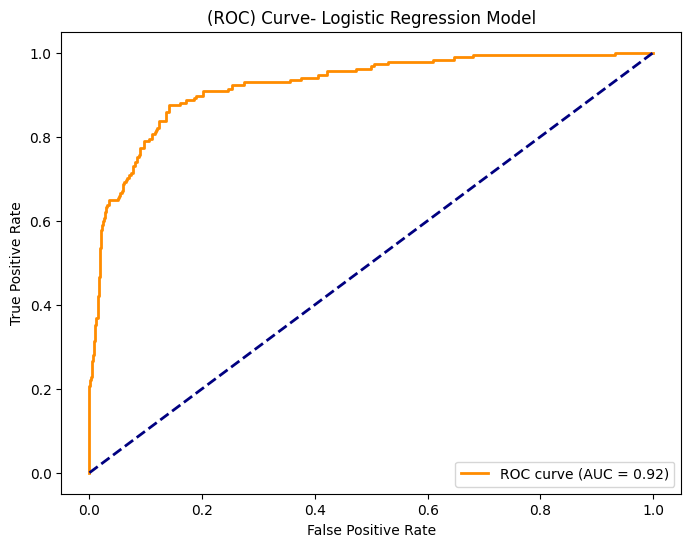

In [40]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the logistic regression model
model_lr.fit(X, y)

# Predict probabilities for the positive class
y_pred_proba = model_lr.predict_proba(X)[:, 1]

# Calculate the false positive rate, true positive rate, and threshold
fpr, tpr, thresholds = roc_curve(y, y_pred_proba)

# Calculate the area under the curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve- Logistic Regression Model')
plt.legend(loc='lower right')
plt.show()

This code predicts the classes using the logistic regression model, creates a confusion matrix, and then plots it using seaborn's heatmap. Adjustments can be made to the visualization as needed.

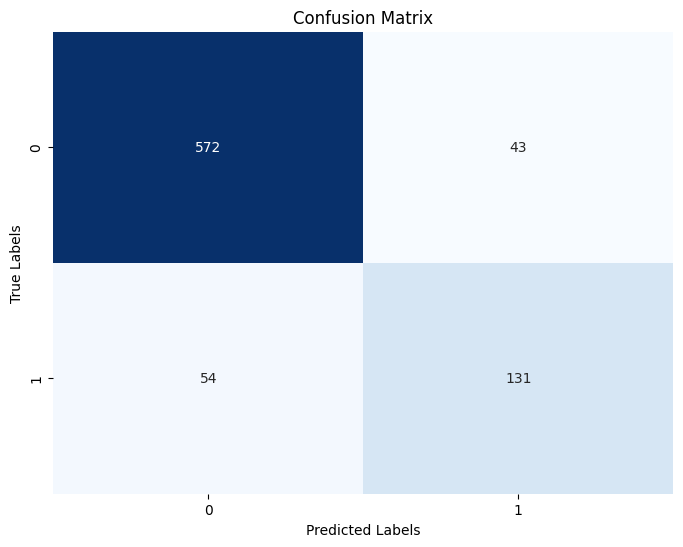

In [41]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Predict classes
y_pred = model_lr.predict(X)

# Create confusion matrix
conf_matrix = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

This code defines a Random Forest classifier with specified hyperparameters, calculates the approximate ROC AUC score using the defined scoring function and cross-validation, and then prints the approximate score. The output provides an approximate score of the Random Forest model's performance. The score indicates how well the model is able to distinguish between the classes based on the ROC AUC metric

In [42]:
from sklearn.ensemble import RandomForestClassifier

# Define the Random Forest model with a specific random state
model_rf = RandomForestClassifier(
    n_estimators=1000,
    max_depth=2,
    random_state=27,  # Adding random state
)

# Calculate scores using the Random Forest model
scores_rf = score(X, y, model_rf, cv=skf)

# Print the approximate score
print("Random Forest Approximate Score:", scores_rf['mean']['test_roc_auc'])


Random Forest Approximate Score: 0.9133377279718744


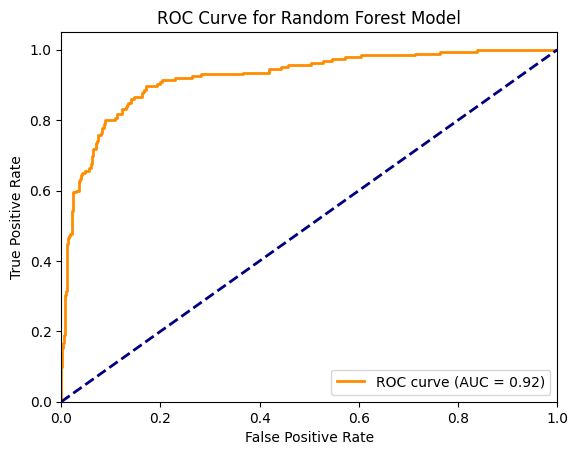

In [43]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Train the Random Forest model (assuming X_train and y_train are your training data)
model_rf.fit(X, y)

# Predict probabilities for the positive class
y_pred_proba_rf = model_rf.predict_proba(X)[:, 1]

# Calculate FPR, TPR, and AUC
fpr_rf, tpr_rf, _ = roc_curve(y, y_pred_proba_rf)
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot ROC curve
plt.figure()
plt.plot(fpr_rf, tpr_rf, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc_rf:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Random Forest Model')
plt.legend(loc='lower right')
plt.show()


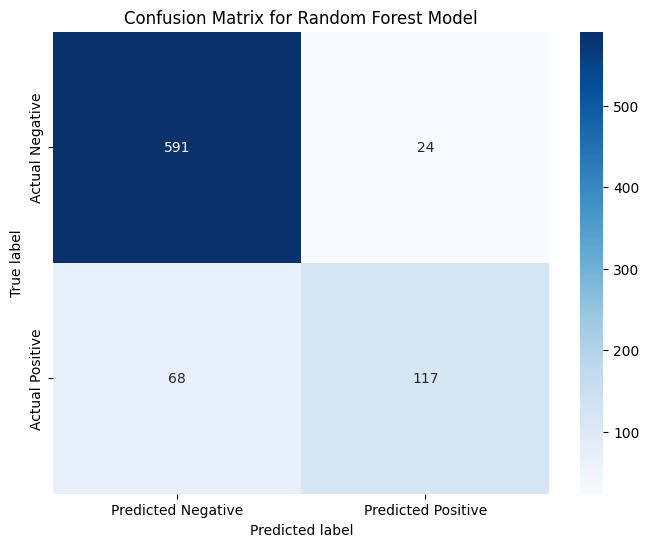

In [44]:
# Predict classes using the trained model
y_pred_rf = model_rf.predict(X)

# Generate confusion matrix
conf_matrix_rf = confusion_matrix(y, y_pred_rf)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix for Random Forest Model')
plt.show()

This code defines a KNN model with 27 neighbors, calculates the scores using cross-validation, and prints the approximate ROC AUC score.

In [45]:
from sklearn.neighbors import KNeighborsClassifier

# Define the KNN model with the specified number of neighbors
model_knn = KNeighborsClassifier(n_neighbors=5)

# Calculate scores using the KNN model
scores_knn = score(X, y, model_knn, cv=skf)

# Print the approximate score
print("KNN Approximate Score:", scores_knn['mean']['test_roc_auc'])


KNN Approximate Score: 0.7867062184135355


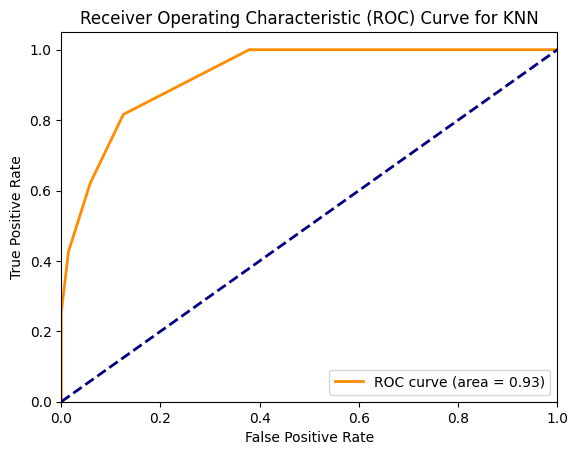

In [46]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Fit the KNN model on the entire dataset
model_knn.fit(X, y)

# Get predicted probabilities for the positive class
y_pred_proba = model_knn.predict_proba(X)[:, 1]

# Compute ROC curve and ROC area for each class
fpr, tpr, _ = roc_curve(y, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for KNN')
plt.legend(loc="lower right")
plt.show()


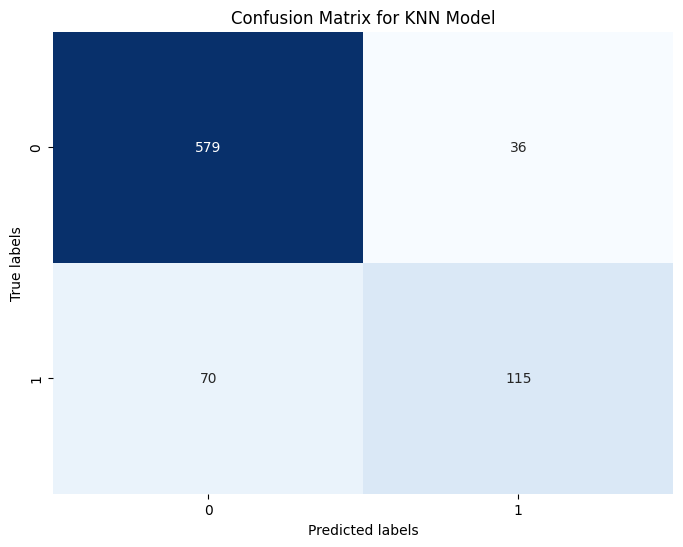

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Fit the KNN model on the entire dataset
model_knn.fit(X, y)

# Get predicted labels
y_pred = model_knn.predict(X)

# Generate confusion matrix
conf_mat = confusion_matrix(y, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN Model')
plt.show()

Based on the output of ROC AUC scores:

#Logistic Regression:
* Approximate Roc AUC Score:0.915271
#Random Forest:
* Approximate ROC AUC Score = 0.913206
#KNN:
* Approximate ROC AUC Score = 0.786794

The Logistic Regression model has the highest ROC AUC score (0.915271), followed closely by the Random Forest model (0.913206). The KNN model has the lowest ROC AUC score (0.786794).

Therefore, based solely on the ROC AUC scores, the Logistic Regression model performs slightly better than the Random Forest model and significantly better than the KNN model in terms of distinguishing between the positive and negative classes.

In [48]:
import pandas as pd

# Create a DataFrame to store the scores
scores_df = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest', 'KNN'],
    'Approximate ROC AUC Score': [scores_lr['mean']['test_roc_auc'], scores_rf['mean']['test_roc_auc'], scores_knn['mean']['test_roc_auc']]
})

# Display the DataFrame
print(scores_df)


                 Model  Approximate ROC AUC Score
0  Logistic Regression                   0.915052
1        Random Forest                   0.913338
2                  KNN                   0.786706


This code will generate a ROC curve for each model based on the AUC scores stored in the DataFrame. Each curve will be labeled with the model name and its corresponding AUC score.

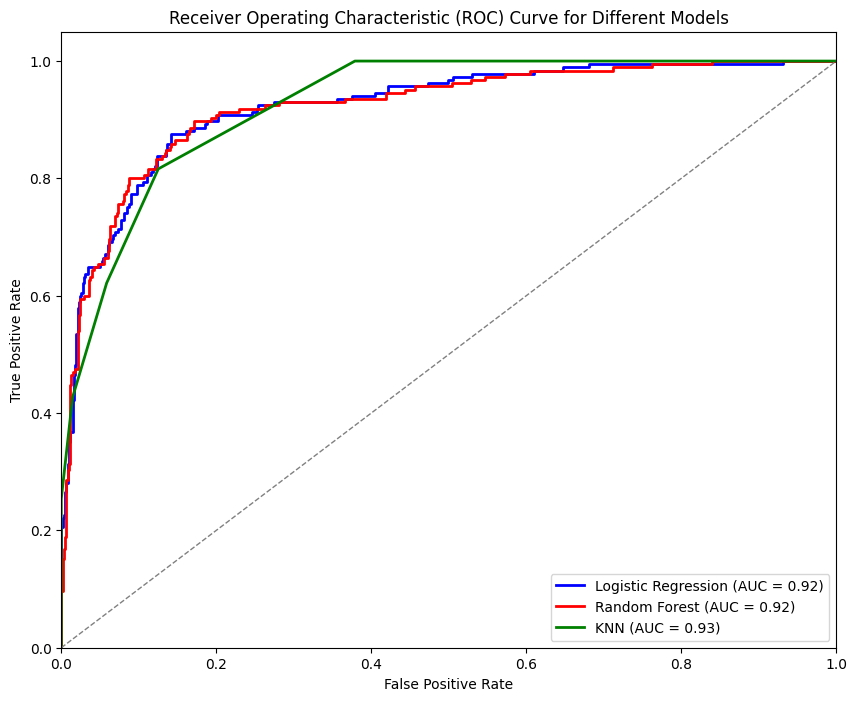

In [49]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Define colors for each model
colors = ['blue', 'red', 'green']

# Define a function to calculate ROC curve
def plot_roc_curve(model, X, y, label, color):
    # Fit the model and predict probabilities
    model.fit(X, y)
    y_pred_proba = model.predict_proba(X)[:, 1]

    # Calculate ROC curve and AUC
    fpr, tpr, _ = roc_curve(y, y_pred_proba)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, color=color, lw=2, label=f'{label} (AUC = {roc_auc:.2f})')

# Initialize figure
plt.figure(figsize=(10, 8))

# Plot ROC curves for all three models
for i, row in scores_df.iterrows():
    model_name = row['Model']
    if model_name == 'Logistic Regression':
        plot_roc_curve(model_lr, X, y, model_name, colors[i])
    elif model_name == 'Random Forest':
        plot_roc_curve(model_rf, X, y, model_name, colors[i])
    elif model_name == 'KNN':
        plot_roc_curve(model_knn, X, y, model_name, colors[i])

# Plot the diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')

# Set plot attributes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve for Different Models')
plt.legend(loc='lower right')
plt.show()

This code will print the confusion matrix for each model based on the predictions made by the respective model. You can easily see the true positives, false positives, true negatives, and false negatives for each model.

In [50]:
from sklearn.metrics import confusion_matrix

# Define a function to generate and display confusion matrix
def generate_confusion_matrix(model, X, y, model_name):
    # Fit the model and predict labels
    model.fit(X, y)
    y_pred = model.predict(X)

    # Generate confusion matrix
    cm = confusion_matrix(y, y_pred)

    # Display the confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    print(cm)
    print()

# Generate confusion matrix for each model
for i, row in scores_df.iterrows():
    model_name = row['Model']
    if model_name == 'Logistic Regression':
        generate_confusion_matrix(model_lr, X, y, model_name)
    elif model_name == 'Random Forest':
        generate_confusion_matrix(model_rf, X, y, model_name)
    elif model_name == 'KNN':
        generate_confusion_matrix(model_knn, X, y, model_name)


Confusion Matrix for Logistic Regression:
[[572  43]
 [ 54 131]]

Confusion Matrix for Random Forest:
[[591  24]
 [ 68 117]]

Confusion Matrix for KNN:
[[579  36]
 [ 70 115]]

